<a href="https://colab.research.google.com/github/ElisaSuarez/czechitas-section3/blob/main/ConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import zipfile
archive = zipfile.ZipFile('archive(1).zip')

for file in archive.namelist():
        archive.extract(file, '.')

In [2]:
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt

mnist = loadmat('homNIST_test.mat')
mnist['img_data'].astype(np.float32)
list(mnist.keys())

['__header__',
 '__version__',
 '__globals__',
 'img_data',
 'labels',
 'hom_matrices']

In [3]:
mnist['img_data'].shape

(320000, 40, 40)

In [4]:
mnist['labels'].shape

(320000, 1)

In [5]:
mnist['hom_matrices'].shape

(320000, 3, 3)

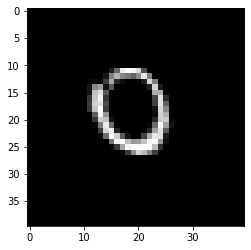

In [6]:
plt.figure()
plt.imshow(mnist['img_data'][0,:,:], cmap='gray')
plt.show()

In [7]:
first_digits = [np.argmax(mnist['labels']==i) for i in range(10)]
first_digits

[0, 32, 64, 128, 192, 288, 256, 96, 224, 160]

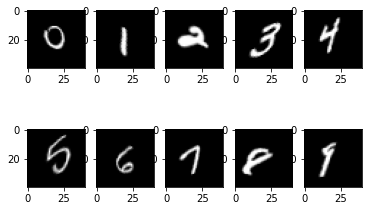

In [8]:
fig, axs = plt.subplots(2,5)

for i,v in enumerate(first_digits):
    if i<5:
        axs[0][i].imshow(mnist['img_data'][v,:,:], cmap='gray')
    else:
        axs[1][i-5].imshow(mnist['img_data'][v,:,:], cmap='gray')

plt.show()

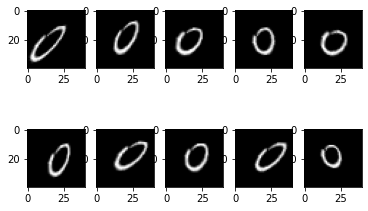

In [9]:
examples_0 = np.argpartition(mnist['labels']==0, 10, axis=0)[-10:].squeeze()

fig, axs = plt.subplots(2,5)

for i,v in enumerate(examples_0):
    if i<5:
        axs[0][i].imshow(mnist['img_data'][v,:,:], cmap='gray')
    else:
        axs[1][i-5].imshow(mnist['img_data'][v,:,:], cmap='gray')

plt.show()

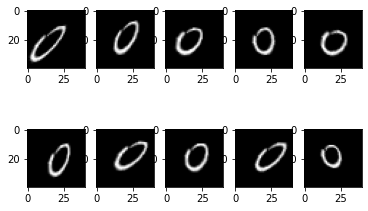

In [10]:
examples_4 = np.argpartition(mnist['labels']==4, 10, axis=0)[-10:].squeeze()

fig, axs = plt.subplots(2,5)

for i,v in enumerate(examples_0):
    if i<5:
        axs[0][i].imshow(mnist['img_data'][v,:,:], cmap='gray')
    else:
        axs[1][i-5].imshow(mnist['img_data'][v,:,:], cmap='gray')

plt.show()

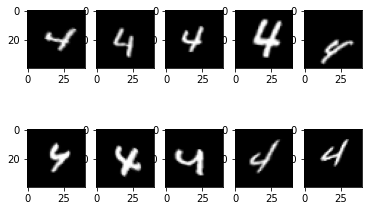

In [11]:
examples,_ = np.nonzero(mnist['labels']==4)
examples = np.random.choice(examples, 10)

fig, axs = plt.subplots(2,5)

for i,v in enumerate(examples):
    if i<5:
        axs[0][i].imshow(mnist['img_data'][v,:,:], cmap='gray')
    else:
        axs[1][i-5].imshow(mnist['img_data'][v,:,:], cmap='gray')

plt.show()

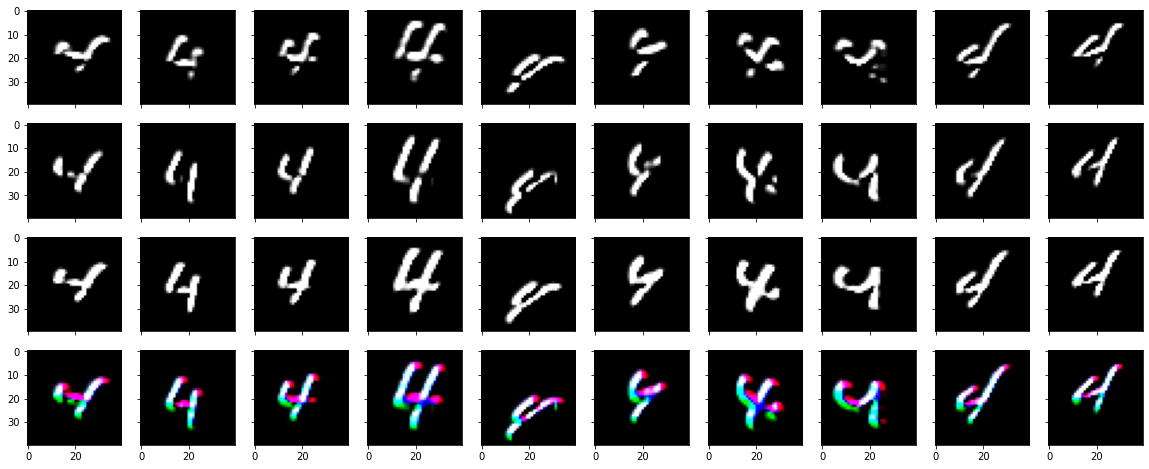

In [12]:
import cv2 as cv

kernel = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]],np.float32)
out1 = [cv.filter2D(mnist['img_data'][v,:,:],-1,kernel) for v in examples]
for i,img in enumerate(out1):
    temp = img
    temp[temp<0] = 0
    temp[temp>1] = 1
    out1[i] = temp

kernel2 = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]],np.float32)
out2 = [cv.filter2D(mnist['img_data'][v,:,:],-1,kernel2) for v in examples]
for i,img in enumerate(out2):
    temp = img
    temp[temp<0] = 0
    temp[temp>1] = 1
    out2[i] = temp

    
kernel3 = np.array([[-2,-1,0],
                   [-1,1,1],
                   [-0,1,2]],np.float32)
out3 = [cv.filter2D(mnist['img_data'][v,:,:],-1,kernel3) for v in examples]
for i,img in enumerate(out3):
    temp = img
    temp[temp<0] = 0
    temp[temp>1] = 1
    out3[i] = temp


out4 = [np.stack([o1,o2,o3], axis=2) for o1,o2,o3 in zip(out1, out2, out3)]
    
fig, axs = plt.subplots(4,10, figsize=(20,8), sharex=True, sharey=True)

for i,v in enumerate(out1+out2+out3 + out4):
    if i<10:
        axs[0][i].imshow(v, cmap='gray')
    elif i<20:
        axs[1][i-10].imshow(v, cmap='gray')
    elif i<30:
        axs[2][i-20].imshow(v, cmap='gray')
    else:
        axs[3][i-30].imshow(v)

plt.show()

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(40,40,1)),
        layers.Conv2D(
            filters=5,
            kernel_size=3,
            activation="relu"),
        layers.Conv2D(
            filters=10,
            kernel_size=3,
            activation="relu"),
        layers.MaxPooling2D(3),
        layers.Conv2D(
            filters=20,
            kernel_size=3,
            activation="relu"),
        layers.GlobalMaxPooling2D(),
        layers.Dense(10,activation="softmax"),
        
    ]
)

print('------------------------------MODEL TO TRAIN----------------------------------')
print(model.summary())


------------------------------MODEL TO TRAIN----------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 5)         50        
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 10)        460       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 20)        1820      
                                                                 
 global_max_pooling2d (Globa  (None, 20)               0         
 lMaxPooling2D)                                                  
                                           

In [14]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=[layer.output for layer in model.layers],
)

print('--------------------------MODEL TO SEE FEATURES-------------------------------')
print(feature_extractor.summary())

--------------------------MODEL TO SEE FEATURES-------------------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 40, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 38, 38, 5)         50        
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 10)        460       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 20)        1820      
                                                                 
 global_max_pooling2d (Globa  (None, 20)        

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist['img_data'],mnist['labels'])
print('Train Set Size: ', x_train.shape[0])
print('Test Set Size: ', x_test.shape[0])

Train Set Size:  240000
Test Set Size:  80000


In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()],
)



history = model.fit(
    x_train,
    tf.squeeze(tf.one_hot(y_train,10)),
    batch_size=100,
    epochs=3,
    validation_data=(
        x_test,
        tf.squeeze(tf.one_hot(y_test,10))
    )
)

Epoch 1/3
2400/2400 [==============================] - 301s 125ms/step - loss: 0.6256 - accuracy: 0.0000e+00 - val_loss: 0.3132 - val_accuracy: 0.0000e+00
Epoch 2/3
2400/2400 [==============================] - 299s 125ms/step - loss: 0.2516 - accuracy: 0.0000e+00 - val_loss: 0.2275 - val_accuracy: 0.0000e+00
Epoch 3/3
2400/2400 [==============================] - 301s 125ms/step - loss: 0.1881 - accuracy: 0.0000e+00 - val_loss: 0.1668 - val_accuracy: 0.0000e+00


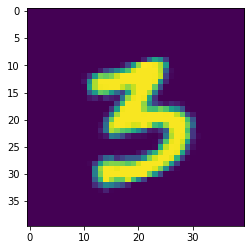

In [17]:
idx = 5
features = feature_extractor(x_test[idx:idx+1,:,:])

plt.figure()
plt.imshow(tf.squeeze(x_test[idx:idx+1,:,:]), vmin=0, vmax=1)
plt.show()

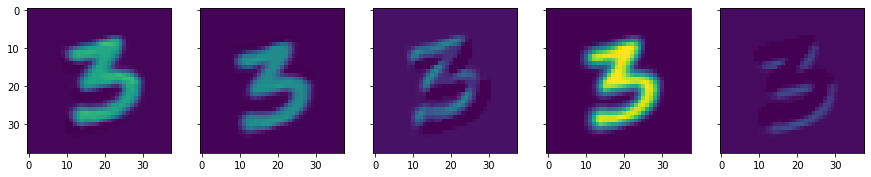

In [18]:
layer = 0
n_maps = features[layer].shape[3]
fig, axs = plt.subplots(1,n_maps, figsize=(15,5), sharex=True, sharey=True)

for i in range(n_maps):
    axs[i].imshow(features[layer][0,:,:,i], vmin=np.min(features[layer]),vmax=np.max(features[layer]))
plt.show()

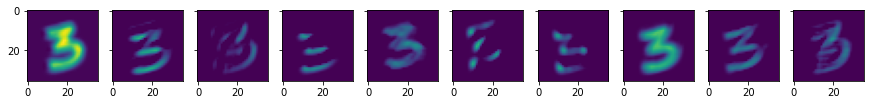

In [19]:
layer = 1
n_maps = features[layer].shape[3]
fig, axs = plt.subplots(1,n_maps, figsize=(15,5), sharex=True, sharey=True)

for i in range(n_maps):
    axs[i].imshow(features[layer][0,:,:,i], vmin=np.min(features[layer]),vmax=np.max(features[layer]))
plt.show()

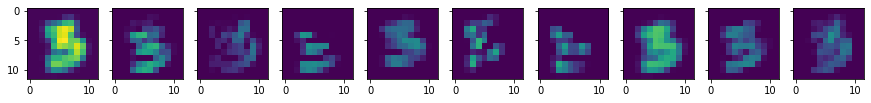

In [20]:
layer = 2
n_maps = features[layer].shape[3]
fig, axs = plt.subplots(1,n_maps, figsize=(15,5), sharex=True, sharey=True)

for i in range(n_maps):
    axs[i].imshow(features[layer][0,:,:,i], vmin=np.min(features[layer]),vmax=np.max(features[layer]))
plt.show()

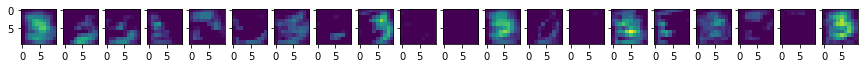

In [21]:
layer = 3
n_maps = features[layer].shape[3]
fig, axs = plt.subplots(1,n_maps, figsize=(15,5), sharex=True, sharey=True)

for i in range(n_maps):
    axs[i].imshow(features[layer][0,:,:,i], vmin=np.min(features[layer]),vmax=np.max(features[layer]))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


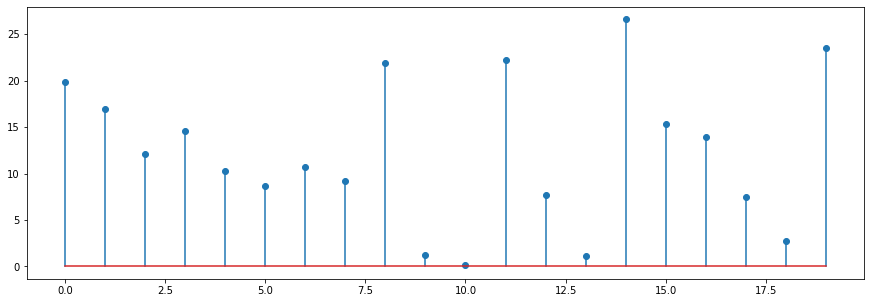

In [22]:
plt.figure(figsize=(15,5))
plt.stem(tf.squeeze(features[4]))
plt.show()

In [23]:
y_test[idx]

array([3.])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


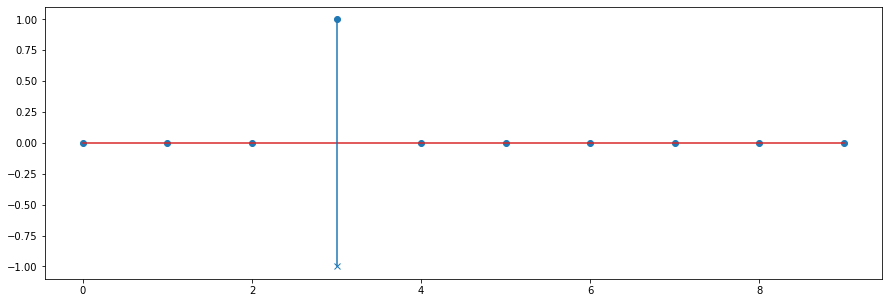

In [24]:
plt.figure(figsize=(15,5))
plt.stem(tf.squeeze(features[5]))
plt.stem(y_test[idx], [-1], markerfmt='x')
plt.show()